In [110]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [111]:
df = pd.read_csv("Brain Tumor.csv")
df = df.drop(["Image"], axis=1)
#df = df.drop(df.columns[6:], axis=1) ### ignore second order features

In [112]:
df.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               3762 non-null   int64  
 1   Mean                3762 non-null   float64
 2   Variance            3762 non-null   float64
 3   Standard Deviation  3762 non-null   float64
 4   Entropy             3762 non-null   float64
 5   Skewness            3762 non-null   float64
 6   Kurtosis            3762 non-null   float64
 7   Contrast            3762 non-null   float64
 8   Energy              3762 non-null   float64
 9   ASM                 3762 non-null   float64
 10  Homogeneity         3762 non-null   float64
 11  Dissimilarity       3762 non-null   float64
 12  Correlation         3762 non-null   float64
 13  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 411.6 KB


In [114]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


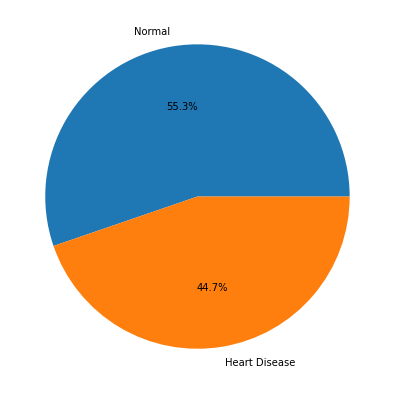

In [115]:
plt.figure(figsize=(7,7))
plt.pie(df['Class'].value_counts(), labels=['Normal', 'Heart Disease'], autopct='%1.1f%%')
plt.show()

### train test split

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop("Class",axis=1), df.Class, test_size=0.25, random_state=7)

##### scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [118]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

## Creating Models

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [120]:
trainAccuracyMap = {}
testAccuracyMap = {}
FalseNegativeMap = {}

### SVC Model

In [121]:
model = SVC(C=1000, gamma=1, kernel='linear') # used grid search to find best parameters (Hyper Parameters Tuning)
model.fit(xtrain, ytrain)
print(f"train score : {model.score(xtrain, ytrain)}")
print(f"test score : {model.score(xtest, ytest)}")

trainAccuracyMap["SVC"] = model.score(xtrain, ytrain)
testAccuracyMap ["SVC"] = model.score(xtest, ytest)

train score : 0.988656504785537
test score : 0.9787460148777896


<AxesSubplot:>

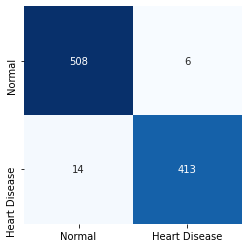

In [122]:
ypredicted = model.predict(xtest)
ConfusionMatrix = confusion_matrix(ytest, ypredicted)
FalseNegativeMap["SVC"] = ConfusionMatrix[1][0]
sns.heatmap(ConfusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

In [123]:
print(classification_report(ytest, ypredicted, target_names=['Normal', 'Heart Disease'], digits=4))

               precision    recall  f1-score   support

       Normal     0.9732    0.9883    0.9807       514
Heart Disease     0.9857    0.9672    0.9764       427

     accuracy                         0.9787       941
    macro avg     0.9794    0.9778    0.9785       941
 weighted avg     0.9789    0.9787    0.9787       941



### Logistic Regression Model

In [124]:
model = LogisticRegression(max_iter=400)
model.fit(xtrain, ytrain)
print(f"train score : {model.score(xtrain, ytrain)}")
print(f"test score : {model.score(xtest, ytest)}")

trainAccuracyMap["Logistic Regression"] = model.score(xtrain, ytrain)
testAccuracyMap ["Logistic Regression"] = model.score(xtest, ytest)

train score : 0.9861751152073732
test score : 0.9744952178533475


<AxesSubplot:>

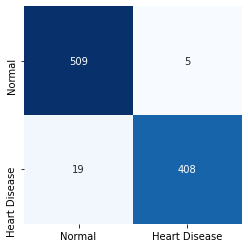

In [125]:
ypredicted = model.predict(xtest)
ConfusionMatrix = confusion_matrix(ytest, ypredicted)
FalseNegativeMap["Logistic Regression"] = ConfusionMatrix[1][0]
sns.heatmap(ConfusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

In [126]:
print(classification_report(ytest, ypredicted, target_names=['Normal', 'Heart Disease'], digits=4))

               precision    recall  f1-score   support

       Normal     0.9640    0.9903    0.9770       514
Heart Disease     0.9879    0.9555    0.9714       427

     accuracy                         0.9745       941
    macro avg     0.9760    0.9729    0.9742       941
 weighted avg     0.9749    0.9745    0.9745       941



### Decision Tree Model

In [127]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(xtrain, ytrain)
print(f"train score : {model.score(xtrain, ytrain)}")
print(f"test score : {model.score(xtest, ytest)}")

trainAccuracyMap["Decision Tree"] = model.score(xtrain, ytrain)
testAccuracyMap ["Decision Tree"] = model.score(xtest, ytest)

train score : 0.9989365473236441
test score : 0.971307120085016


<AxesSubplot:>

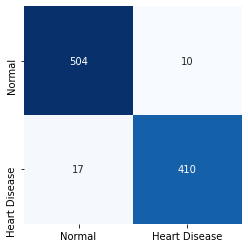

In [128]:
ypredicted = model.predict(xtest)
ConfusionMatrix = confusion_matrix(ytest, ypredicted)
FalseNegativeMap["Decision Tree"] = ConfusionMatrix[1][0]
sns.heatmap(ConfusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

In [129]:
print(classification_report(ytest, ypredicted, target_names=['Normal', 'Heart Disease'], digits=4))

               precision    recall  f1-score   support

       Normal     0.9674    0.9805    0.9739       514
Heart Disease     0.9762    0.9602    0.9681       427

     accuracy                         0.9713       941
    macro avg     0.9718    0.9704    0.9710       941
 weighted avg     0.9714    0.9713    0.9713       941



### Random Forest Model

In [130]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(f"train score : {model.score(xtrain, ytrain)}")
print(f"test score : {model.score(xtest, ytest)}")

trainAccuracyMap["Random Forest"] = model.score(xtrain, ytrain)
testAccuracyMap ["Random Forest"] = model.score(xtest, ytest)

train score : 1.0
test score : 0.973432518597237


<AxesSubplot:>

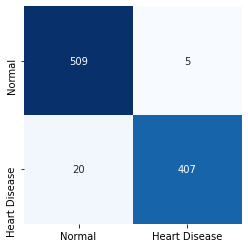

In [131]:
ypredicted = model.predict(xtest)
ConfusionMatrix = confusion_matrix(ytest, ypredicted)
FalseNegativeMap["Random Forest"] = ConfusionMatrix[1][0]
sns.heatmap(ConfusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

In [132]:
print(classification_report(ytest, ypredicted, target_names=['Normal', 'Heart Disease'], digits=4))

               precision    recall  f1-score   support

       Normal     0.9622    0.9903    0.9760       514
Heart Disease     0.9879    0.9532    0.9702       427

     accuracy                         0.9734       941
    macro avg     0.9750    0.9717    0.9731       941
 weighted avg     0.9738    0.9734    0.9734       941



### KNN Model

In [133]:
train_accuracy = []
test_accuracy = []
best_test_accuracy = 0
best_i = 1

neighbors_range = np.arange(1,101)
for i in neighbors_range:

    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain, ytrain)
    
    ypredicted = model.predict(xtrain)
    score = accuracy_score(ytrain, ypredicted)
    train_accuracy.append(score)

    ypredicted = model.predict(xtest)
    score = accuracy_score(ytest, ypredicted)
    test_accuracy.append(score)
    
    if score > best_test_accuracy : 
        best_test_accuracy = score
        best_i = i

best n_neighbors is 1 with 
train accuracy = 1.0
test_accuracy = 0.9872476089266737


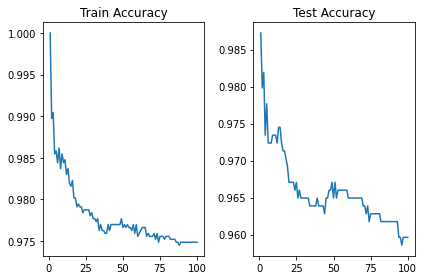

In [134]:
print(f"best n_neighbors is {best_i} with \ntrain accuracy = {train_accuracy[best_i-1]}\ntest_accuracy = {test_accuracy[best_i-1]}")

trainAccuracyMap["KNN"] = train_accuracy[best_i-1]
testAccuracyMap ["KNN"] = test_accuracy[best_i-1]

fig, a =  plt.subplots(1,2)
a[0].plot(neighbors_range, train_accuracy)
a[0].set_title('Train Accuracy')
a[1].plot(neighbors_range, test_accuracy)
a[1].set_title('Test Accuracy')
fig.tight_layout()
plt.show()


<AxesSubplot:>

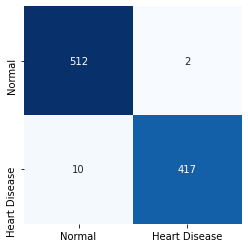

In [135]:
model = KNeighborsClassifier(n_neighbors=best_i)
model.fit(xtrain, ytrain)
ypredicted = model.predict(xtest)
ConfusionMatrix = confusion_matrix(ytest, ypredicted)
FalseNegativeMap["KNN"] = ConfusionMatrix[1][0]
sns.heatmap(ConfusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

In [136]:
print(classification_report(ytest, ypredicted, target_names=['Normal', 'Heart Disease'], digits=4))

               precision    recall  f1-score   support

       Normal     0.9808    0.9961    0.9884       514
Heart Disease     0.9952    0.9766    0.9858       427

     accuracy                         0.9872       941
    macro avg     0.9880    0.9863    0.9871       941
 weighted avg     0.9874    0.9872    0.9872       941



### sklearn's Perceptron Model

In [137]:
model = MLPClassifier(
    max_iter=200,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=7
)
model.fit(xtrain, ytrain)

yTrainPredicted = model.predict(xtrain)
yTestPredicted = model.predict(xtest)
print('MLP Train Accuracy: {:.2f}%'.format(accuracy_score(ytrain, yTrainPredicted) * 100))
print('MLP Test Accuracy: {:.2f}%'.format(accuracy_score(ytest, yTestPredicted) * 100))

trainAccuracyMap["NN"] = accuracy_score(ytrain, yTrainPredicted)
testAccuracyMap ["NN"] = accuracy_score(ytest, yTestPredicted)

MLP Train Accuracy: 98.55%
MLP Test Accuracy: 96.92%


<AxesSubplot:>

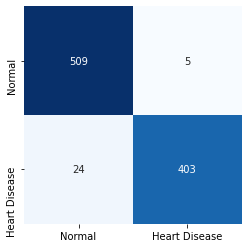

In [138]:
ypredicted = model.predict(xtest)
ConfusionMatrix = confusion_matrix(ytest, ypredicted)
FalseNegativeMap["NN"] = ConfusionMatrix[1][0]
sns.heatmap(ConfusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

In [139]:
print(classification_report(ytest, ypredicted, target_names=['Normal', 'Heart Disease'], digits=4))

               precision    recall  f1-score   support

       Normal     0.9550    0.9903    0.9723       514
Heart Disease     0.9877    0.9438    0.9653       427

     accuracy                         0.9692       941
    macro avg     0.9714    0.9670    0.9688       941
 weighted avg     0.9698    0.9692    0.9691       941



### Linear Discriminant Analysis Model

In [140]:
model = LinearDiscriminantAnalysis()
model.fit(xtrain, ytrain)

yTrainPredicted = model.predict(xtrain)
yTestPredicted = model.predict(xtest)
print(f'LDA Train Accuracy: {accuracy_score(ytrain, yTrainPredicted)}')
print(f'LDA Test Accuracy: {accuracy_score(ytest, yTestPredicted)}')

trainAccuracyMap["LDA"] = accuracy_score(ytrain, yTrainPredicted)
testAccuracyMap ["LDA"] = accuracy_score(ytest, yTestPredicted)

LDA Train Accuracy: 0.9790854306983339
LDA Test Accuracy: 0.9628055260361318


<AxesSubplot:>

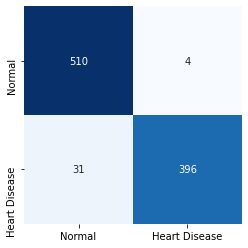

In [141]:
ypredicted = model.predict(xtest)
ConfusionMatrix = confusion_matrix(ytest, ypredicted)
FalseNegativeMap["LDA"] = ConfusionMatrix[1][0]
sns.heatmap(ConfusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

In [142]:
print(classification_report(ytest, ypredicted, target_names=['Normal', 'Heart Disease'], digits=4))

               precision    recall  f1-score   support

       Normal     0.9427    0.9922    0.9668       514
Heart Disease     0.9900    0.9274    0.9577       427

     accuracy                         0.9628       941
    macro avg     0.9663    0.9598    0.9623       941
 weighted avg     0.9642    0.9628    0.9627       941



### Gaussian Naive Bays Model

In [143]:
model = GaussianNB()
model.fit(xtrain, ytrain)

yTrainPredicted = model.predict(xtrain)
yTestPredicted = model.predict(xtest)
print(f'GNB Train Accuracy: {accuracy_score(ytrain, yTrainPredicted)}')
print(f'GNB Test Accuracy: {accuracy_score(ytest, yTestPredicted)}')

trainAccuracyMap["GNB"] = accuracy_score(ytrain, yTrainPredicted)
testAccuracyMap ["GNB"] = accuracy_score(ytest, yTestPredicted)

GNB Train Accuracy: 0.967741935483871
GNB Test Accuracy: 0.953241232731137


<AxesSubplot:>

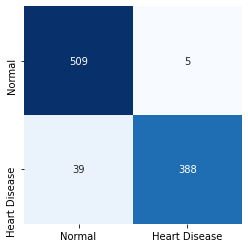

In [144]:
ypredicted = model.predict(xtest)
ConfusionMatrix = confusion_matrix(ytest, ypredicted)
FalseNegativeMap["GNB"] = ConfusionMatrix[1][0]
sns.heatmap(ConfusionMatrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

In [145]:
print(classification_report(ytest, ypredicted, target_names=['Normal', 'Heart Disease'], digits=4))

               precision    recall  f1-score   support

       Normal     0.9288    0.9903    0.9586       514
Heart Disease     0.9873    0.9087    0.9463       427

     accuracy                         0.9532       941
    macro avg     0.9581    0.9495    0.9525       941
 weighted avg     0.9554    0.9532    0.9530       941



### Models Visualization

[Text(0, 3, '0.978746'),
 Text(0, 3, '0.974495'),
 Text(0, 3, '0.971307'),
 Text(0, 3, '0.973433'),
 Text(0, 3, '0.987248'),
 Text(0, 3, '0.969182'),
 Text(0, 3, '0.962806'),
 Text(0, 3, '0.953241')]

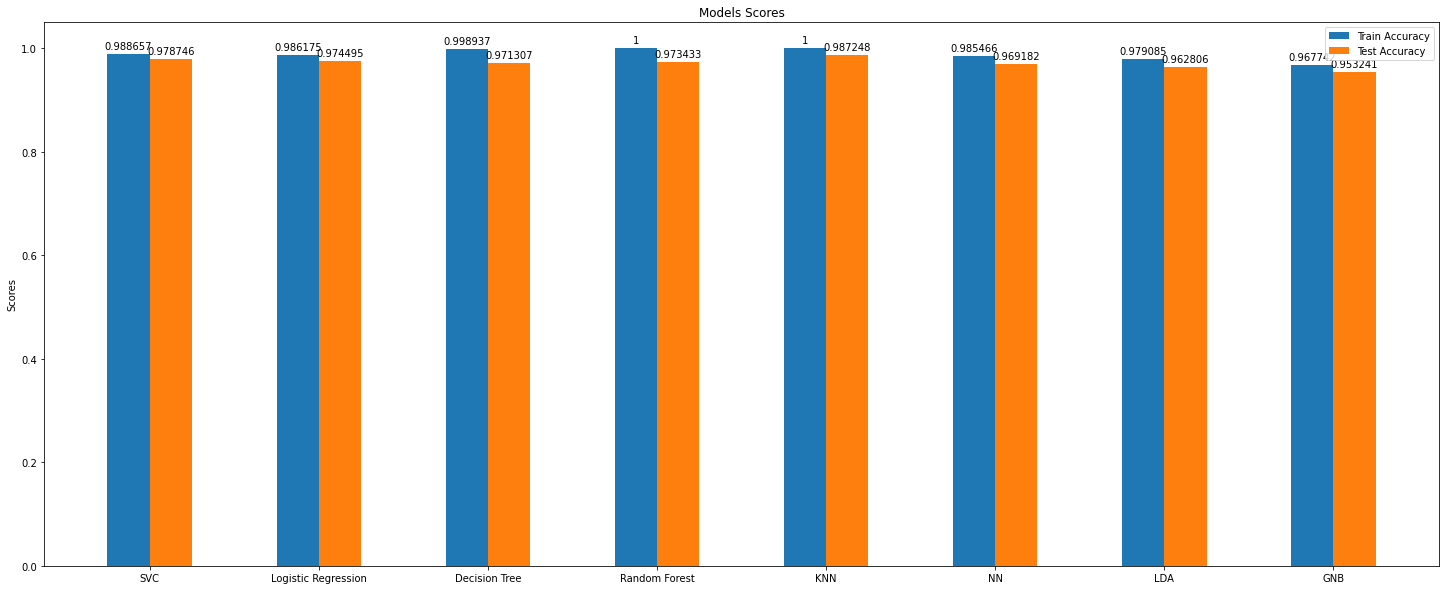

In [146]:
labels = trainAccuracyMap.keys()
train_scores = trainAccuracyMap.values()
test_scores = testAccuracyMap.values()

x = np.arange(len(labels)) 
width = 0.25  

fig, ax = plt.subplots(figsize=(25,15))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy')


ax.set_ylabel('Scores')
ax.set_title('Models Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();
ax.bar_label(rects1, padding=3) 
ax.bar_label(rects2, padding=3)

In [147]:
AccuracyMap = {}
for key, value in trainAccuracyMap.items():
    AccuracyMap[key] = [value, testAccuracyMap[key], FalseNegativeMap[key]]

[Text(0, 3, '0.967742'),
 Text(0, 3, '0.979085'),
 Text(0, 3, '0.985466'),
 Text(0, 3, '0.986175'),
 Text(0, 3, '0.988657'),
 Text(0, 3, '0.998937'),
 Text(0, 3, '1'),
 Text(0, 3, '1')]

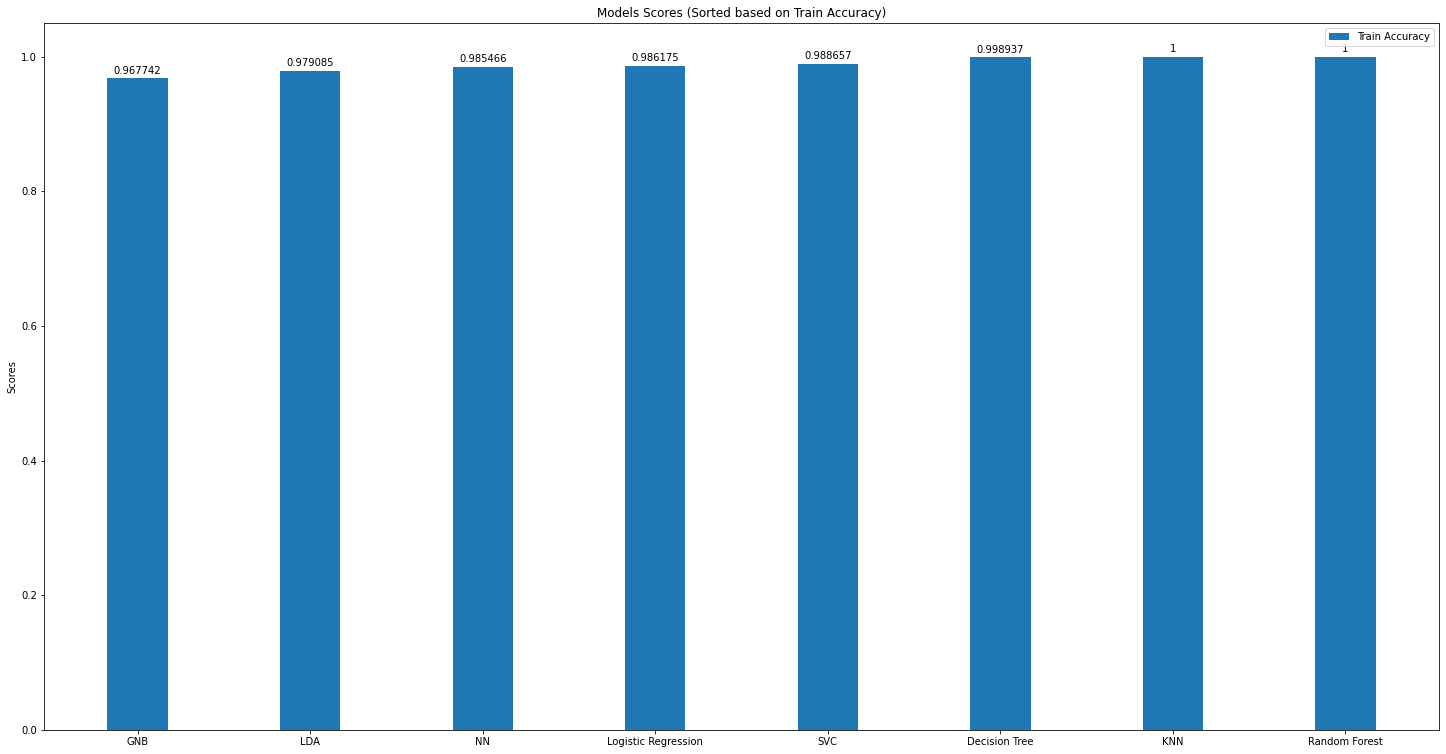

In [154]:
AccuracyMap = dict(sorted(AccuracyMap.items(), key=lambda item: item[1][0]))
labels = AccuracyMap.keys()
train_scores = [val[0] for val in AccuracyMap.values()]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(25,15))
rects1 = ax.bar(labels, train_scores, label='Train Accuracy', width=0.35)

ax.set_ylabel('Scores')
ax.set_title('Models Scores (Sorted based on Train Accuracy)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();
ax.bar_label(rects1, padding=3) 

[Text(0, 3, '0.953241'),
 Text(0, 3, '0.962806'),
 Text(0, 3, '0.969182'),
 Text(0, 3, '0.971307'),
 Text(0, 3, '0.973433'),
 Text(0, 3, '0.974495'),
 Text(0, 3, '0.978746'),
 Text(0, 3, '0.987248')]

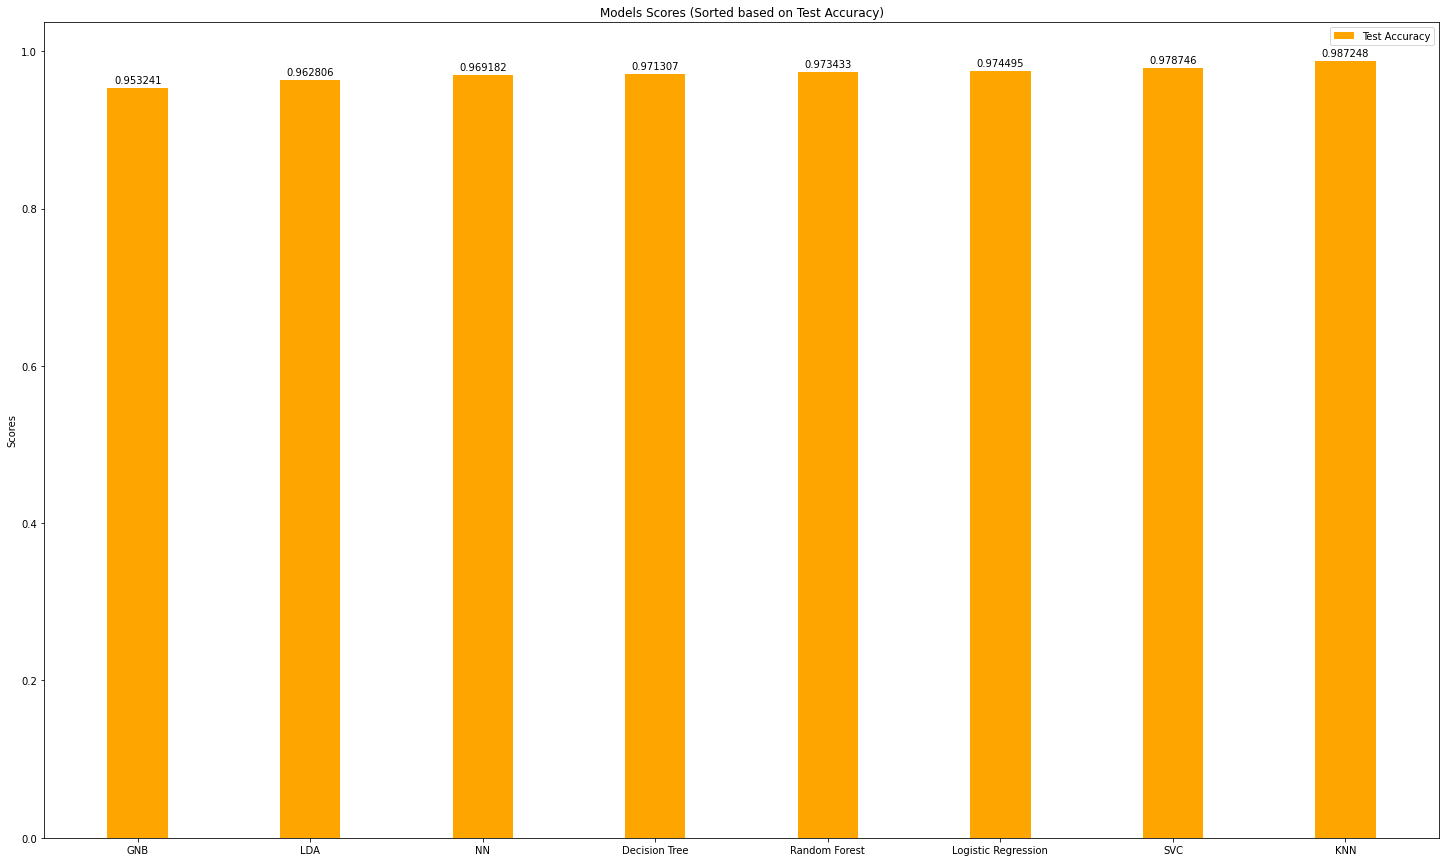

In [159]:
AccuracyMap = dict(sorted(AccuracyMap.items(), key=lambda item: item[1][1]))
labels = AccuracyMap.keys()
test_scores = [val[1] for val in AccuracyMap.values()]

x = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(25,15))
rects2 = ax.bar(labels, test_scores, color = "orange", label='Test Accuracy', width=0.35)

ax.set_ylabel('Scores')
ax.set_title('Models Scores (Sorted based on Test Accuracy)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();
ax.bar_label(rects2, padding=3) 

[Text(0, 3, '10'),
 Text(0, 3, '14'),
 Text(0, 3, '17'),
 Text(0, 3, '19'),
 Text(0, 3, '20'),
 Text(0, 3, '24'),
 Text(0, 3, '31'),
 Text(0, 3, '39')]

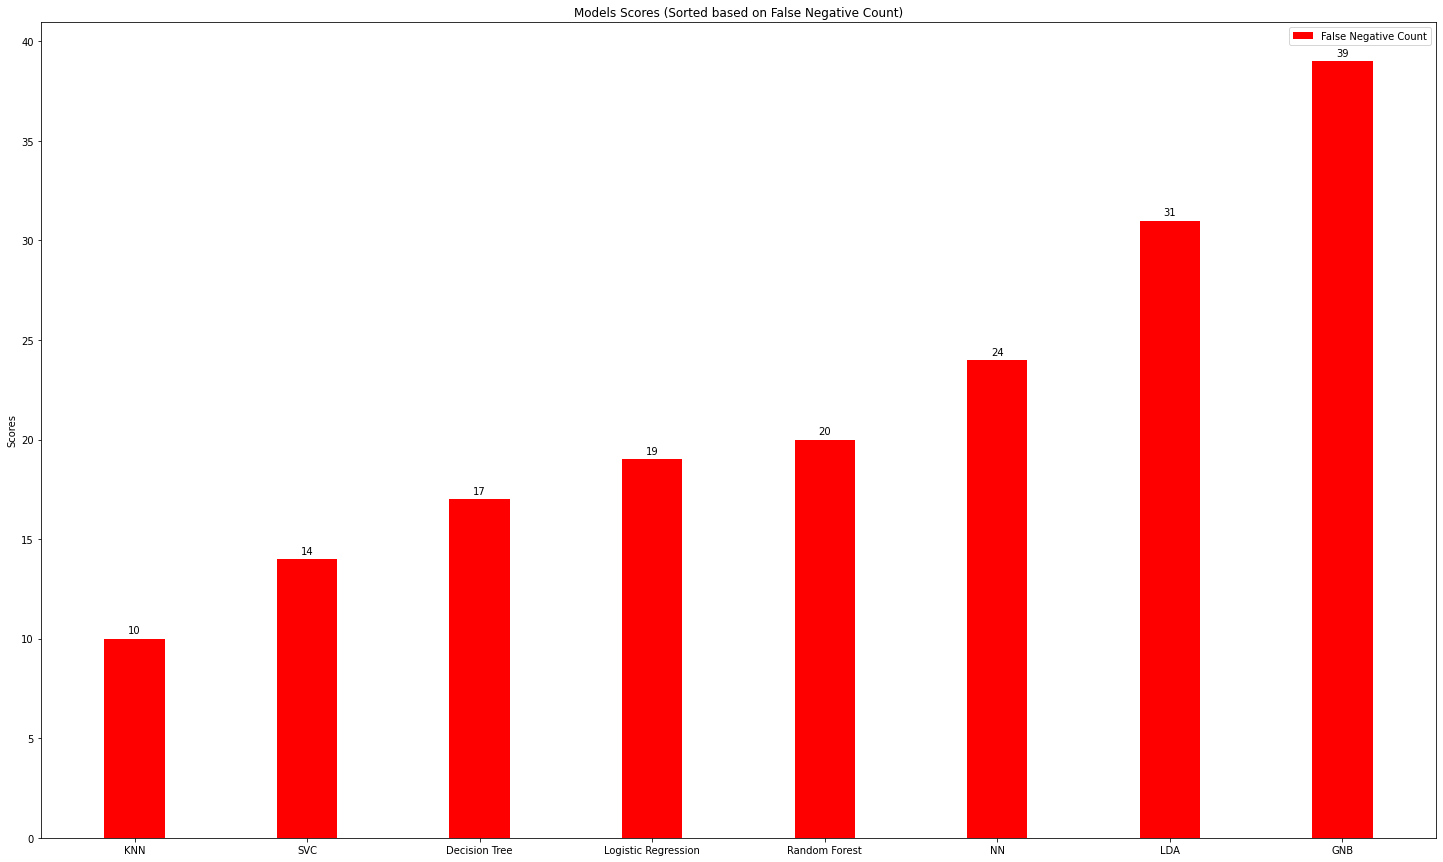

In [160]:
AccuracyMap = dict(sorted(AccuracyMap.items(), key=lambda item: item[1][2]))
labels = AccuracyMap.keys()
FalseNegativeCount = [val[2] for val in AccuracyMap.values()]

x = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(25,15))
rects1 = ax.bar(labels, FalseNegativeCount,color="red",  label='False Negative Count', width=0.35)

ax.set_ylabel('Scores')
ax.set_title('Models Scores (Sorted based on False Negative Count)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();
ax.bar_label(rects1, padding=3) 